<a href="https://colab.research.google.com/github/Gladys-la/AI-ML-Projects/blob/main/Employee_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import modules
import pandas  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
%matplotlib inline

In [3]:
data=pandas.read_csv('Churn_Modelling.csv')
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: xlabel='CreditScore', ylabel='Age'>

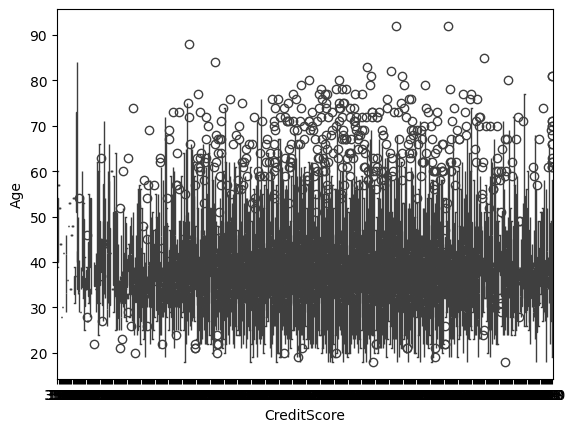

In [8]:
sns.boxplot(x='CreditScore', y='Age', data=data)

<Axes: xlabel='Age', ylabel='Tenure'>

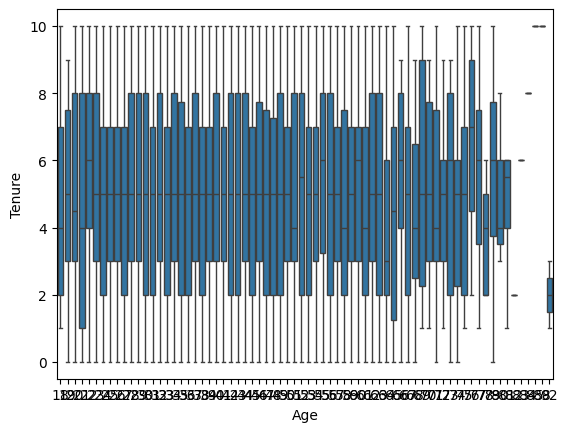

In [9]:
sns.boxplot(x='Age',y='Tenure', data=data)

<Axes: xlabel='Tenure', ylabel='EstimatedSalary'>

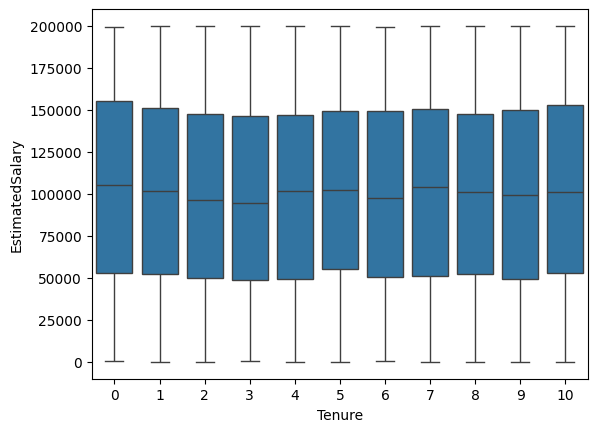

In [10]:
sns.boxplot(x='Tenure', y='EstimatedSalary', data=data)

<Axes: xlabel='EstimatedSalary', ylabel='Exited'>

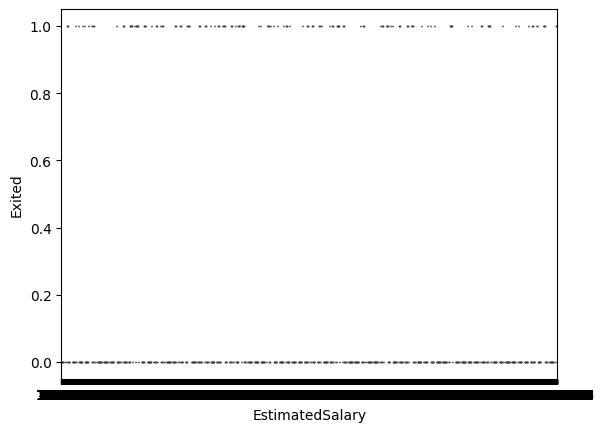

In [11]:
sns.boxplot(x='EstimatedSalary', y='Exited', data=data)

In [12]:
# Select numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64','string'])

# Group by 'Exited' and calculate the mean for numeric columns
left = numeric_columns.groupby(data['Exited']).mean()



In [13]:
left.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2.000000,2.000000e+00,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,4965.306245,1.569061e+07,648.602347,41.123193,4.983012,81926.918058,1.509738,0.703106,0.457695,100602.034651,0.500000
std,83.988332,7.890725e+02,4.597395,5.253526,0.071089,12984.773338,0.048832,0.005712,0.136995,1221.375473,0.707107
min,4905.917526,1.569005e+07,645.351497,37.408389,4.932744,72745.296779,1.475209,0.699067,0.360825,99738.391772,0.000000
25%,4935.611885,1.569033e+07,646.976922,39.265791,4.957878,77336.107418,1.492473,0.701087,0.409260,100170.213212,0.250000
50%,4965.306245,1.569061e+07,648.602347,41.123193,4.983012,81926.918058,1.509738,0.703106,0.457695,100602.034651,0.500000
75%,4995.000605,1.569089e+07,650.227771,42.980595,5.008145,86517.728698,1.527003,0.705126,0.506130,101033.856091,0.750000
max,5024.694964,1.569117e+07,651.853196,44.837997,5.033279,91108.539337,1.544267,0.707146,0.554565,101465.677531,1.000000


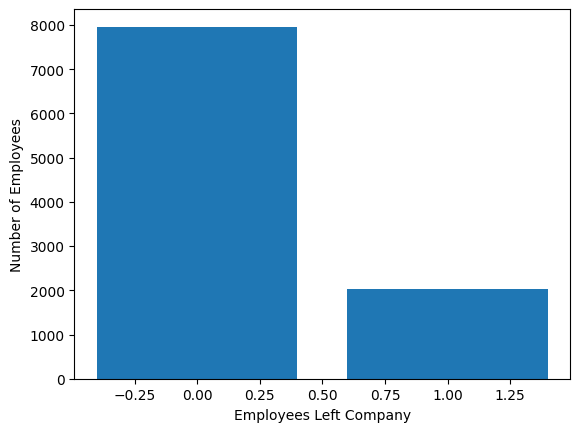

In [14]:
exit_count=data.groupby('Exited').count()
plt.bar(exit_count.index.values, exit_count['IsActiveMember'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()


In [15]:
data.Exited.value_counts()


Exited
0    7963
1    2037
Name: count, dtype: int64

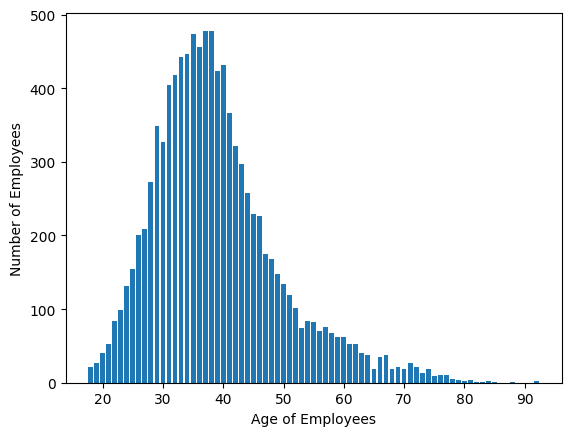

In [16]:
exit_count=data.groupby('Age').count()
plt.bar(exit_count.index.values, exit_count['IsActiveMember'])
plt.xlabel('Age of Employees')
plt.ylabel('Number of Employees')
plt.show()


In [17]:
gender = numeric_columns.groupby(data['Gender']).mean()

In [18]:
gender.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2.000000,2.000000e+00,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,4995.678726,1.569096e+07,650.554141,38.948313,5.008889,76416.671823,1.531367,0.705259,0.514066,100133.059156,0.207637
std,74.598584,2.698097e+02,0.392089,0.410229,0.060511,1070.987726,0.018055,0.003733,0.016001,662.533918,0.060922
min,4942.929562,1.569077e+07,650.276892,38.658237,4.966102,75659.369139,1.518600,0.702619,0.502751,99664.576931,0.164559
25%,4969.304144,1.569086e+07,650.415516,38.803275,4.987495,76038.020481,1.524983,0.703939,0.508409,99898.818043,0.186098
50%,4995.678726,1.569096e+07,650.554141,38.948313,5.008889,76416.671823,1.531367,0.705259,0.514066,100133.059156,0.207637
75%,5022.053309,1.569105e+07,650.692765,39.093351,5.030283,76795.323164,1.537750,0.706578,0.519723,100367.300269,0.229176
max,5048.427891,1.569115e+07,650.831389,39.238389,5.051677,77173.974506,1.544134,0.707898,0.525380,100601.541382,0.250715


<ipython-input-19-4a3a4d36bb00>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender.index, y='Exited', data=gender, palette='viridis')


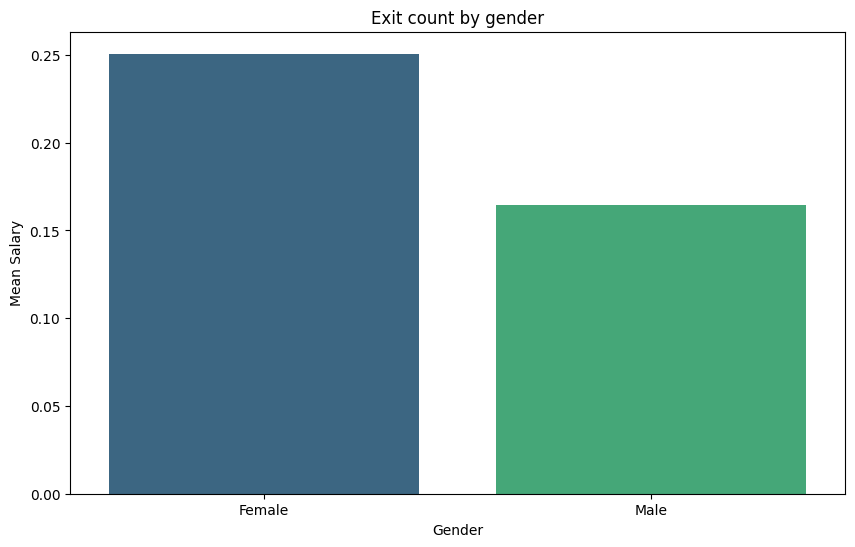

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=gender.index, y='Exited', data=gender, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Mean Salary')
plt.title('Exit count by gender')
plt.show()

<ipython-input-29-bbb6a100ba33>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i+1)


ValueError: num must be an integer with 1 <= num <= 8, not 9

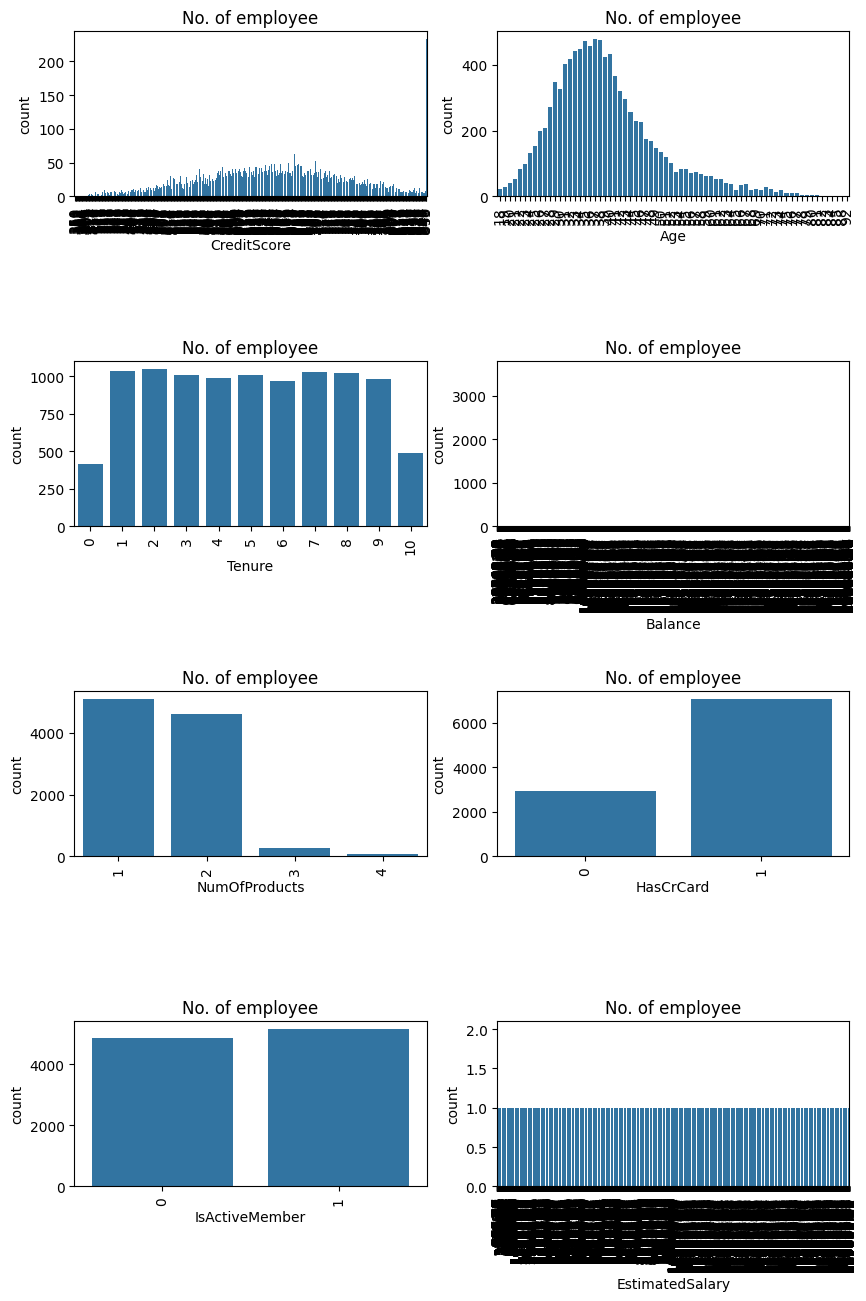

In [29]:
features=['CreditScore','Age','Tenure','Balance', 'NumOfProducts','HasCrCard','IsActiveMember', 'EstimatedSalary','Exited']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")


<ipython-input-42-4a32ee1eb499>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i+1)


ValueError: num must be an integer with 1 <= num <= 8, not 9

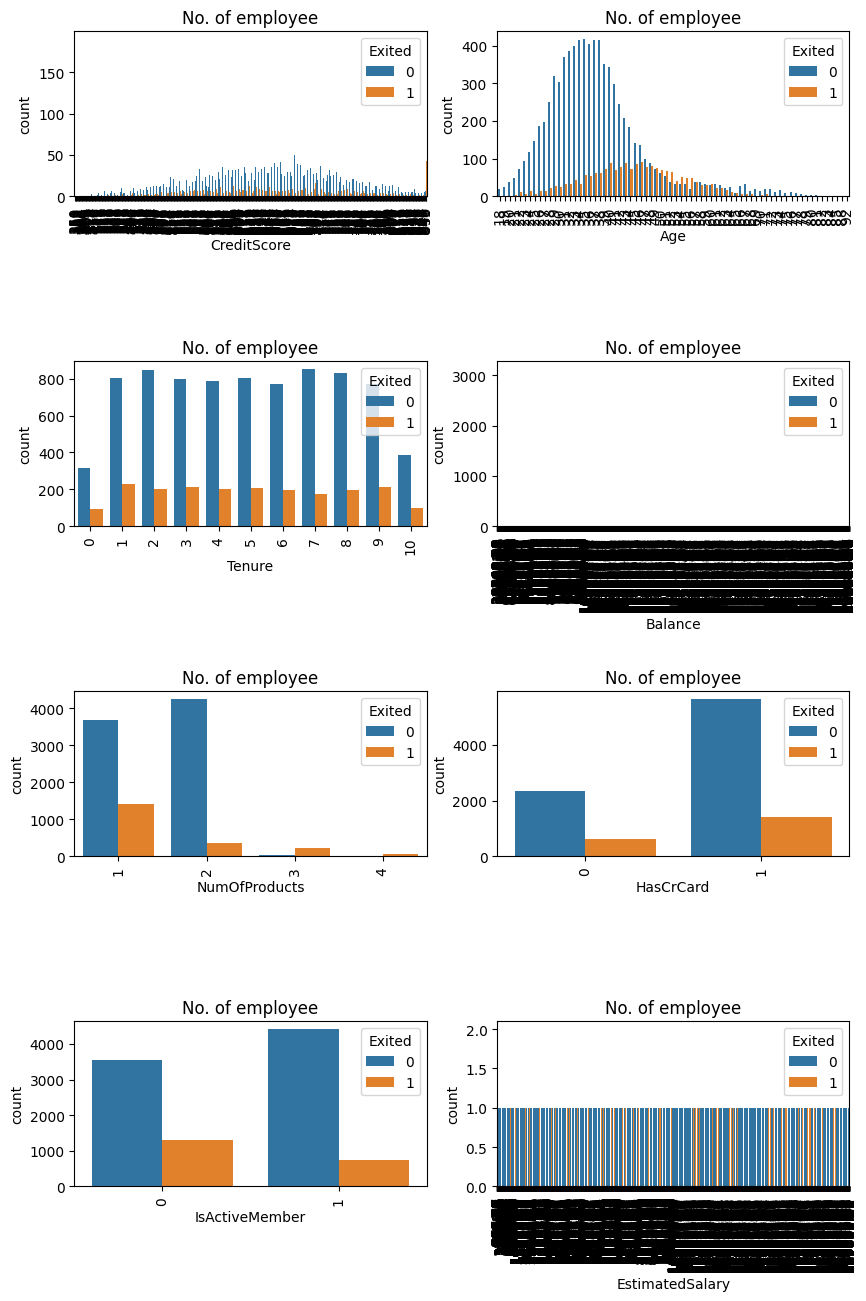

In [42]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='Exited')
    plt.xticks(rotation=90)
    plt.title("No. of employee")


In [ ]:
fig, axes = plt.subplots(figsize=(10, 15), nrows=len(features)//2 + len(features)%2, ncols=2)

# Loop through each feature and its corresponding axis
for i, j in enumerate(features):
    # Plot on the current axis
    sns.countplot(x=j, data=data, hue='Exited', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title("No. of Employees")
    axes[i//2, i%2].set_xlabel(j)
    axes[i//2, i%2].set_ylabel("Count")
    axes[i//2, i%2].tick_params(axis='x', rotation=90)

# Remove empty subplots if there are an odd number of features
if len(features) % 2 != 0:
    fig.delaxes(axes[len(features)//2, 1])

plt.subplots_adjust(hspace=0.5)
plt.show()


<ipython-input-43-156c8f7e249b>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i+1)


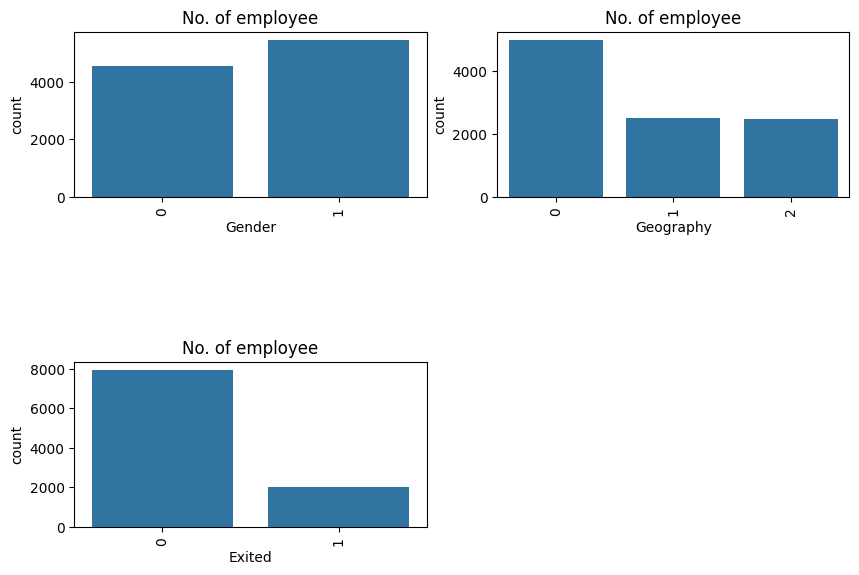

In [43]:
feature=['Gender','Geography','Exited']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(feature):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

<ipython-input-44-b7625ff995aa>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i+1)


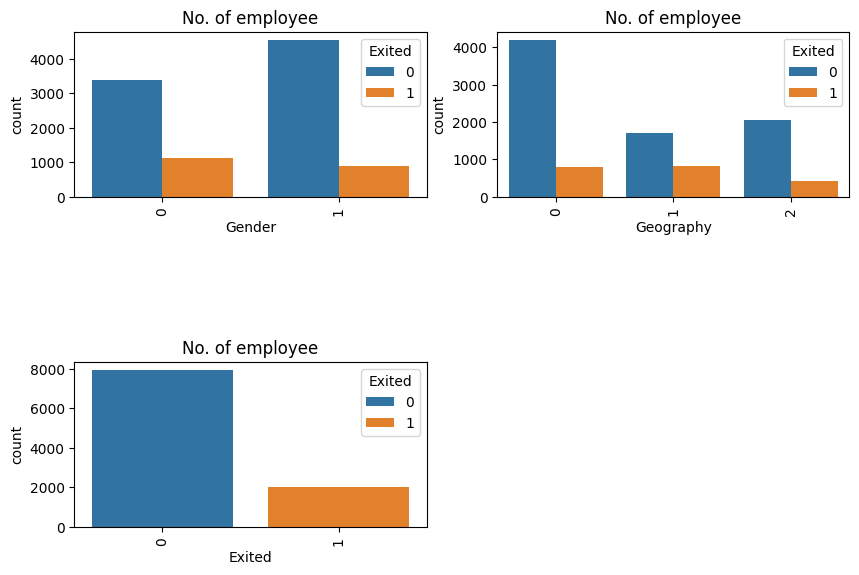

In [44]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(feature):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='Exited')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

In [39]:
from sklearn.cluster import KMeans
# Filter data
left_emp =  data[['EstimatedSalary', 'NumOfProducts']][data.Exited == 1]

kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [45]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['EstimatedSalary'], left_emp['NumOfProducts'], c=left_emp['label'],cmap='Accent')
plt.xlabel('EstimatedSalary')
plt.ylabel('NumOfProducts')
plt.title('3 Clusters of exited employees ')
plt.show()


ValueError: Length of values (10000) does not match length of index (2037)

In [28]:
from sklearn.preprocessing import StandardScaler

In [27]:
from sklearn import preprocessing

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

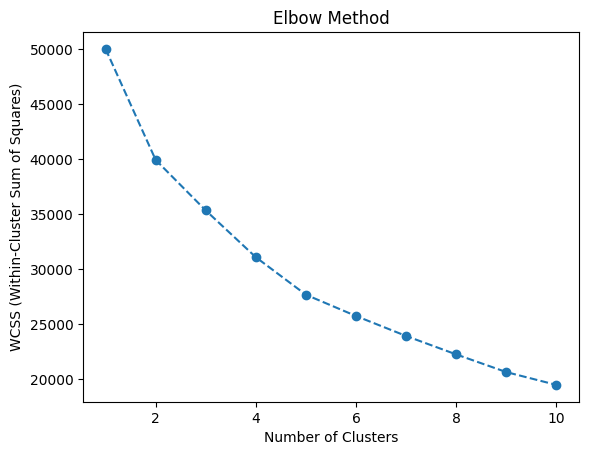

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


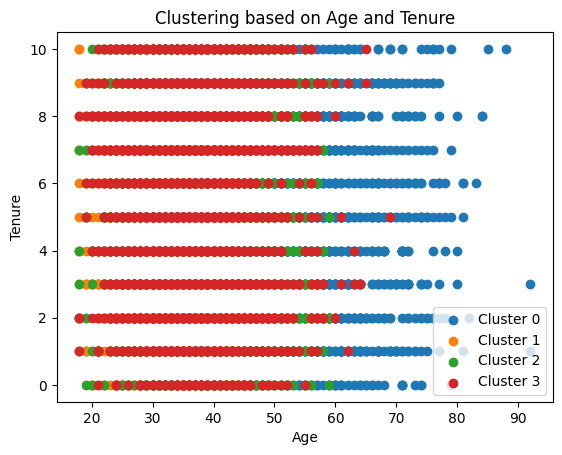

In [40]:
selected_features = ['EstimatedSalary', 'Age', 'Tenure', 'NumOfProducts', 'IsActiveMember']

# Select the relevant features
X = data[selected_features]

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

# Based on the Elbow method, choose the optimal number of clusters
n_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
data['Cluster'] = cluster_labels

# Visualize the clusters
for cluster in range(n_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    # Plot cluster data based on selected features (e.g., Age vs. Tenure)
    plt.scatter(cluster_data['Age'], cluster_data['Tenure'], label=f'Cluster {cluster}')

plt.xlabel('Age')
plt.ylabel('Tenure')
plt.title('Clustering based on Age and Tenure')
plt.legend()
plt.show()

In [ ]:

#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
data['Gender']=le.fit_transform(data['Gender'])
data['Geography']=le.fit_transform(data['Geography'])


In [22]:
#Spliting data into Feature and
X=data[['CreditScore',	'Geography',	'Gender',	'Age',	'Tenure',	'Balance',	'NumOfProducts',	'HasCrCard',	'IsActiveMember',	'EstimatedSalary']]
y=data['Exited']


In [35]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test


In [36]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)


In [37]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.8586666666666667
Precision: 0.75
Recall: 0.410958904109589
